 #!pip3 install umap-learn<br>
 https://stackoverflow.com/questions/57242208/how-to-resolve-the-error-module-umap-has-no-attribute-umap-i-tried-installi

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap.umap_ as umap
from sklearn.decomposition import PCA
import pandas as pd

# 첫 번째 줄에서 %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

# 랜덤 데이터  생성

In [4]:
np.random.seed(42)
data = np.random.rand(800, 7)

In [7]:
data.shape

(800, 7)

# Principal Component analysis

In [11]:
data

array([[0.37454012, 0.95071431, 0.73199394, ..., 0.15601864, 0.15599452,
        0.05808361],
       [0.86617615, 0.60111501, 0.70807258, ..., 0.96990985, 0.83244264,
        0.21233911],
       [0.18182497, 0.18340451, 0.30424224, ..., 0.43194502, 0.29122914,
        0.61185289],
       ...,
       [0.43913066, 0.03994797, 0.36229349, ..., 0.7014991 , 0.45934366,
        0.05510154],
       [0.42689473, 0.46902494, 0.92855553, ..., 0.31165292, 0.52531826,
        0.06605531],
       [0.97256824, 0.3600599 , 0.47786735, ..., 0.68251173, 0.66223216,
        0.71532231]])

In [8]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정

printcipalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [9]:
principalDf

,principal component1,principal component2
0,0.038518,0.088680
1,-0.051747,-0.440596
2,-0.151669,0.275096
3,-0.297278,0.346515
4,0.138247,-0.607890
...,...,...
795,0.276982,0.378855
796,-0.046547,-0.654238
797,0.311939,0.516789
798,0.390766,-0.027483


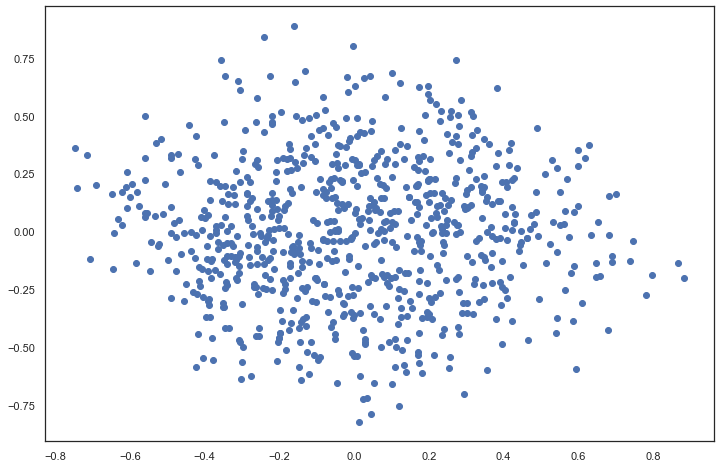

In [12]:
plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1])

<br><br>
랜덤 데이터로 UMAP 학습 및 시각화

In [13]:
fit = umap.UMAP()
%time u = fit.fit_transform(data)

Wall time: 5.79 s


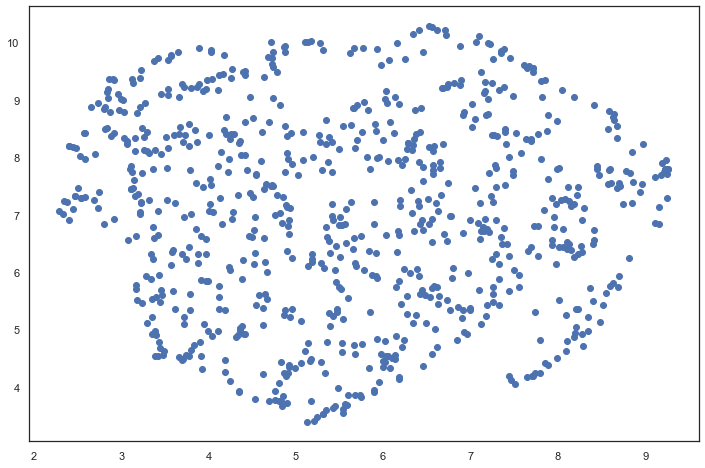

In [14]:
plt.scatter(u[:,0], u[:,1])

In [15]:
import pandas as pd
from sklearn.datasets import load_iris # scikit-learn의 샘플 데이터 로드를 위해 import
from sklearn.preprocessing import LabelEncoder

iris = load_iris() # sample data load

data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# 출력 클래스 레이블을 숫자 값으로 분류
le = LabelEncoder()
le.fit(data['target'])
data['target'] = le.transform(data['target'])

In [17]:
data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [25]:
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

In [26]:
fit = umap.UMAP()
%time u = fit.fit_transform(X)

Wall time: 1.76 s


In [36]:
X.shape

(150, 4)

In [40]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
u

array([[12.870807  ,  9.208525  ],
       [14.101702  ,  7.371006  ],
       [14.344068  ,  8.099758  ],
       [14.253709  ,  7.857445  ],
       [13.031556  ,  9.210592  ],
       [11.6550865 ,  8.60729   ],
       [14.199765  ,  8.376887  ],
       [13.124931  ,  8.700158  ],
       [14.474604  ,  7.632937  ],
       [13.8505745 ,  7.662102  ],
       [11.719103  ,  9.036379  ],
       [13.5565195 ,  8.213037  ],
       [14.11048   ,  7.476137  ],
       [14.681995  ,  7.6936526 ],
       [11.413016  ,  8.82861   ],
       [11.332696  ,  8.799436  ],
       [11.685587  ,  8.919846  ],
       [12.710005  ,  9.1508665 ],
       [11.453433  ,  8.796464  ],
       [11.865455  ,  8.64004   ],
       [12.178618  ,  9.236624  ],
       [12.331789  ,  8.723467  ],
       [14.0133295 ,  8.613191  ],
       [12.783206  ,  8.568312  ],
       [13.418051  ,  8.132052  ],
       [13.805247  ,  7.484115  ],
       [12.875674  ,  8.641267  ],
       [12.400163  ,  9.076646  ],
       [12.625601  ,

In [34]:
u.shape

(150, 2)

In [35]:
u[:,0].shape

(150,)

In [42]:
y.shape

(150,)

In [39]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

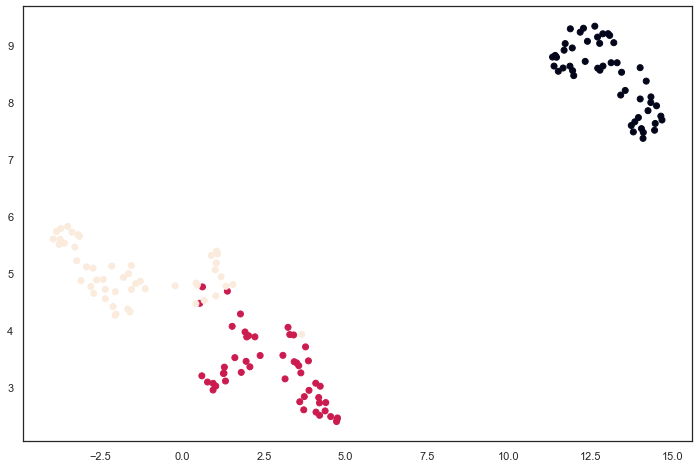

In [38]:
plt.scatter(u[:,0], u[:,1], c=y) # c=y 에서 y는 객체

Lung Cancer 데이터를 활용한 Dimensional Reduction

In [43]:
Data = pd.read_csv("Censored_clinical_lungCancer_survival.csv")

In [44]:
Data.head()

,PatientID,Age,Sex,Smoke,COPD,DM,HTN,CEA_pre,SUV,Extent,...,pN,pStage,cell,Subtype,CEA_Post,Relapse,Recur,Recurrence,Death,Overall
0,14031352,73,2,1,0,0,1,1.0,4.11,3,...,2,4,1,4,0.0,0,0,107.833333,0,107.833333
1,9394389,73,1,1,0,0,0,1.4,3.50,3,...,2,4,1,3,1.2,0,0,144.033333,0,144.033333
2,9619514,53,1,1,0,0,0,1.7,4.20,3,...,2,4,1,3,1.8,1,1,23.233333,1,48.066667
3,9650404,57,2,1,0,1,1,1.0,1.60,3,...,2,4,1,4,0.0,0,0,93.533333,0,93.533333
4,10009869,42,1,2,0,0,0,1.0,3.30,3,...,3,5,1,2,1.2,0,0,93.066667,0,93.066667


In [45]:
Data.columns

Index(['PatientID', 'Age', 'Sex', 'Smoke', 'COPD', 'DM', 'HTN', 'CEA_pre',
       'SUV', 'Extent', 'Vascular', 'Lymphatic', 'Perineural', 'VPI',
       'Adjacent', 'Aerogenous', 'pT', 'pN', 'pStage', 'cell', 'Subtype',
       'CEA_Post', 'Relapse', 'Recur', 'Recurrence', 'Death', 'Overall'],
      dtype='object')

In [46]:
Data = Data[['Age', 'Sex', 'Smoke', 'COPD', 'DM', 'HTN', 'CEA_pre', 'SUV', 'Extent', 'Vascular', 'Lymphatic', 'Perineural', 'VPI', 'Adjacent', 'Aerogenous', 'pT', 'pN', 'pStage', 'cell', 'Subtype', 'CEA_Post', 'Relapse', 'Recur', 'Recurrence', 'Death', 'Overall']]

In [47]:
Data.isna().sum()

Age            0
Sex            0
Smoke          0
COPD           0
DM             0
HTN            0
CEA_pre       37
SUV           76
Extent         0
Vascular       0
Lymphatic      0
Perineural     0
VPI            0
Adjacent       0
Aerogenous     0
pT             0
pN             0
pStage         0
cell           0
Subtype        0
CEA_Post      29
Relapse        0
Recur          0
Recurrence     0
Death          0
Overall        0
dtype: int64

In [48]:
Data = Data.dropna()

In [49]:
### Death를 빼고 데이터를 UMAP으로 projection
Data_tmp = Data[['Age', 'Sex', 'Smoke', 'COPD', 'DM', 'HTN', 'CEA_pre', 'SUV', 'Extent', 'Vascular',
      'Lymphatic', 'Perineural', 'VPI', 'Adjacent', 'Aerogenous', 'pStage', 'pT', 'pN', 
      'cell', 'Subtype', 'CEA_Post', 'Relapse', 'Recur', 'Recurrence', 'Overall']]

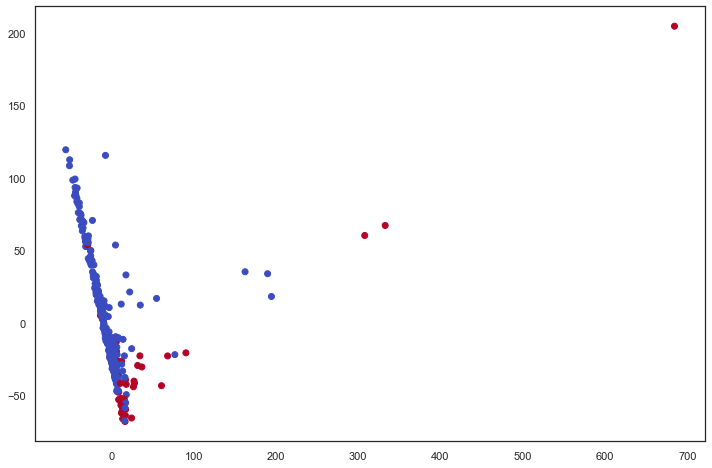

In [52]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(Data_tmp)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], c=Data['Death'], cmap='coolwarm')

Wall time: 1.98 s


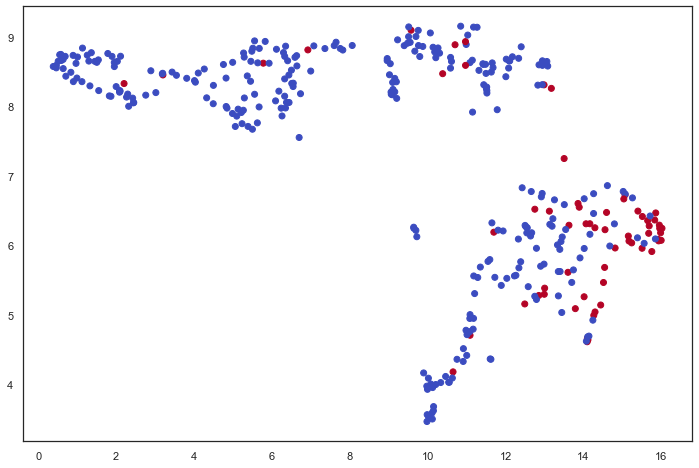

In [53]:
fit = umap.UMAP(n_neighbors=20)
%time u = fit.fit_transform(Data_tmp)

plt.scatter(u[:,0], u[:,1], c=Data['Death'], cmap='coolwarm')

Wall time: 1.75 s


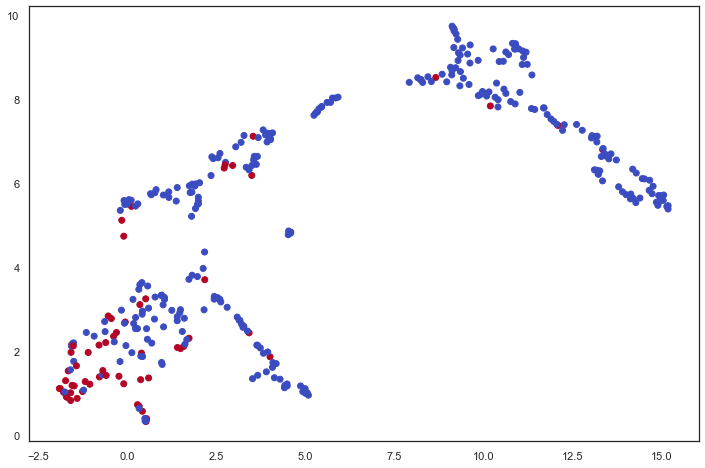

In [54]:
fit = umap.UMAP(n_neighbors=10)
%time u = fit.fit_transform(Data_tmp)

plt.scatter(u[:,0], u[:,1], c=Data['Death'], cmap='coolwarm')

Wall time: 2.01 s


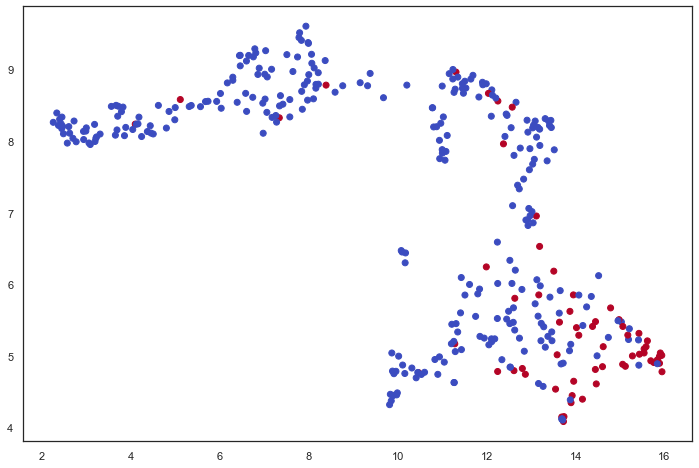

In [55]:
fit = umap.UMAP(n_neighbors=30)
%time u = fit.fit_transform(Data_tmp)

plt.scatter(u[:,0], u[:,1], c=Data['Death'], cmap='coolwarm')